In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

#  1. Load the dataset

In [5]:

data = pd.read_csv(r"C:\Users\user\Downloads\titanic_dataset.csv")

In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Make 'PassengerId' as index column

In [4]:

data = pd.read_csv(r"C:\Users\HP\Downloads\titanic_dataset.csv",index_col = 'PassengerId' )

In [7]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Check the basic details of dataset

In [8]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
data.shape

(891, 12)

In [10]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 4. Fill the Missing Values

In [16]:
data['Age'] = data['Age'].fillna(data['Age'].mode()[0])

In [17]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [18]:
data['Cabin'] = data['Cabin'].fillna(data['Cabin'].mode()[0])


In [19]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Check and handle outliers

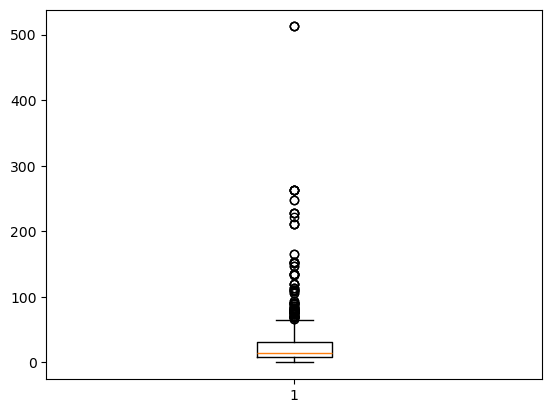

In [20]:

plt.boxplot(data['Fare'])
plt.show()

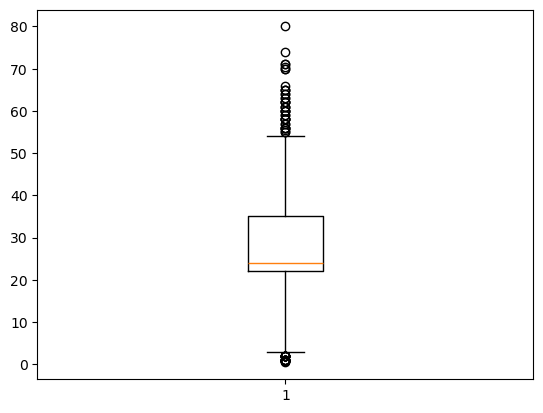

In [21]:
plt.boxplot(data['Age'])
plt.show()

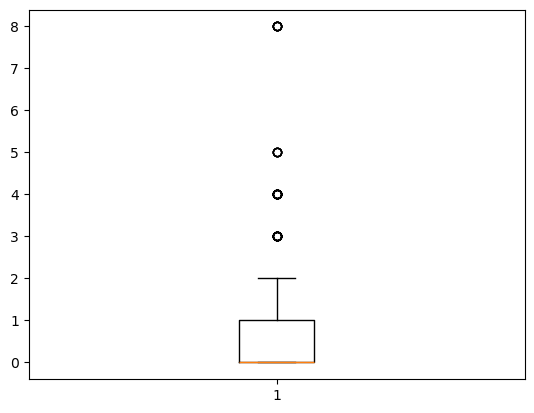

In [22]:
plt.boxplot(data['SibSp'])
plt.show()

In [23]:
Q1 = np.percentile(data['Fare'],25)

In [24]:
Q1

7.9104

In [25]:
Q2 = np.percentile(data['Fare'],50)

In [26]:
Q2

14.4542

In [27]:
Q3 = np.percentile(data['Fare'],75)

In [28]:
Q3

31.0

In [29]:
IQR = Q3-Q1

In [30]:
IQR

23.0896

In [31]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

In [32]:
lower_limit

-26.724

In [33]:
upper_limit

65.6344

In [34]:
outlier = []
for x in data['Fare']:
    if x > upper_limit or x < lower_limit:
        outlier.append(x)

In [35]:
outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

In [36]:
ind = data['Fare']>upper_limit
loca=data.loc[ind].index

In [37]:
loca

Index([  1,  27,  31,  34,  52,  61,  62,  72,  88, 102,
       ...
       792, 802, 820, 829, 835, 846, 849, 856, 863, 879],
      dtype='int64', length=116)

In [70]:
data.drop(loca, inplace = True)

In [72]:
data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,B96 B98,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,B96 B98,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,B96 B98,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,B96 B98,C


In [74]:
data.shape

(775, 11)

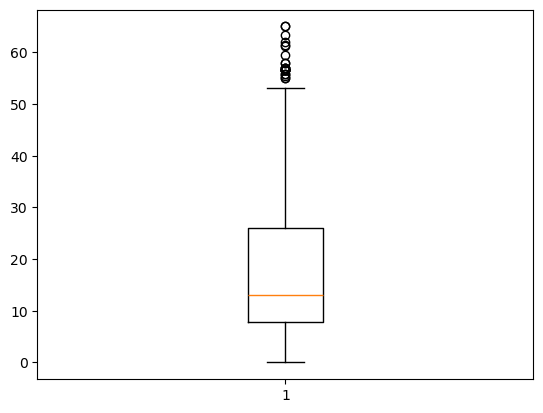

In [76]:
plt.boxplot(data['Fare'])
plt.show()

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [39]:
x = data

In [40]:
x['Embarked'] = le.fit_transform(x['Embarked'])

In [41]:
x['Sex'] = le.fit_transform(x['Sex'])

In [42]:
x.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,B96 B98,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,B96 B98,2


In [43]:
x = x.drop(['Name','Ticket','Cabin'],axis=1)

In [44]:
x.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [45]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler(feature_range=(0,1))
x = minmax.fit_transform(x)

In [46]:
type(x)

numpy.ndarray

In [47]:
x = pd.DataFrame(x)

In [48]:
type(x)

pandas.core.frame.DataFrame

In [49]:
x.describe()

,0,1,2,3,4,5,6,7,8
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.500000,0.383838,0.654321,0.647587,0.353694,0.065376,0.063599,0.062858,0.768238
std,0.289162,0.486592,0.418036,0.477990,0.165865,0.137843,0.134343,0.096995,0.395752
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.000000,0.500000,0.000000,0.271174,0.000000,0.000000,0.015440,0.500000
50%,0.500000,0.000000,1.000000,1.000000,0.296306,0.000000,0.000000,0.028213,1.000000
75%,0.750000,1.000000,1.000000,1.000000,0.434531,0.125000,0.000000,0.060508,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
x.head()

,0,1,2,3,4,5,6,7,8
0,0.000000,0.0,1.0,1.0,0.271174,0.125,0.0,0.014151,1.0
1,0.001124,1.0,0.0,0.0,0.472229,0.125,0.0,0.139136,0.0
2,0.002247,1.0,1.0,0.0,0.321438,0.000,0.0,0.015469,1.0
3,0.003371,1.0,0.0,0.0,0.434531,0.125,0.0,0.103644,1.0
4,0.004494,0.0,1.0,1.0,0.434531,0.000,0.0,0.015713,1.0


In [51]:
data = pd.concat([data,x], axis = 1)

In [52]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,0,1,2,3,4,5,6,7,8
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,2,0.000000,0.0,1.0,1.0,0.271174,0.125,0.0,0.014151,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,...,0,0.001124,1.0,0.0,0.0,0.472229,0.125,0.0,0.139136,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,...,2,0.002247,1.0,1.0,0.0,0.321438,0.000,0.0,0.015469,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,...,2,0.003371,1.0,0.0,0.0,0.434531,0.125,0.0,0.103644,1.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,...,2,0.004494,0.0,1.0,1.0,0.434531,0.000,0.0,0.015713,1.0
